## Exploratory Data Analysis of SuperStore Data

### Problem Statement
A US Superstore despite generating good revenue is not able to see the corresponding increase in their Profit. Assuming the their cost to be fixed, the Superstore is expecting suggestions to improve and maximize their Profit based on the data provided

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/abcd/Desktop/TSF/SampleSuperstore.csv')

In [3]:
df.shape

(9994, 13)

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing data in the dataset

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
# Dropping unwanted feature
data = df.drop(['Postal Code'], axis =1)
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Sales & Profit seems to be affected by outliers


In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Seperation catogery and numerical features from the data

In [9]:
data_category = [feature for feature in data.columns if data[feature].nunique() < 13 ] + ['State','City', 'Sub-Category']
data_numerical = [feature for feature in data.columns if feature not in data_category]

In [10]:
for feature in data.columns:
    if feature in data_category:
        if data[feature].nunique() < 10:
            print('Categories in {} are {} \n'. format(feature,data[feature].unique()))

Categories in Ship Mode are ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

Categories in Segment are ['Consumer' 'Corporate' 'Home Office'] 

Categories in Country are ['United States'] 

Categories in Region are ['South' 'West' 'Central' 'East'] 

Categories in Category are ['Furniture' 'Office Supplies' 'Technology'] 



#### Descriptive Statistics of numerical features

In [11]:
for element in data_numerical: print('{}\n'.format(data[element].describe()))

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64



### Analysing Trend and Relationship between features

<AxesSubplot:>

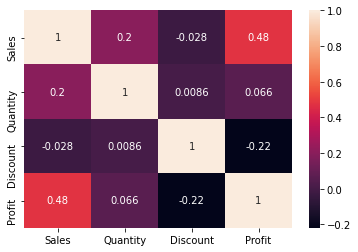

In [12]:
correlation = data.corr()
sns.heatmap(correlation, annot =True)

Profit & Sales has moderately strong positive relation

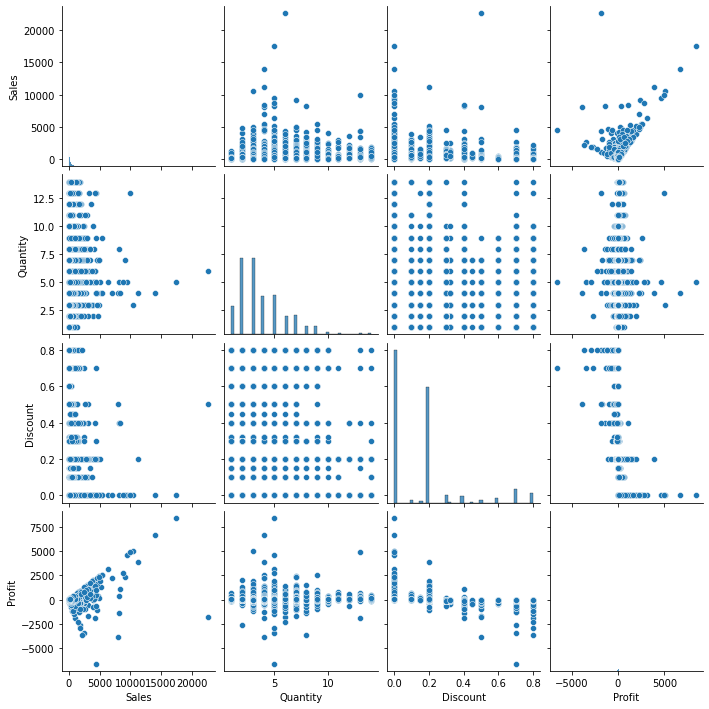

In [13]:
sns.pairplot(data)

Sales Profit pairplot exhibits some kind of positive correlation

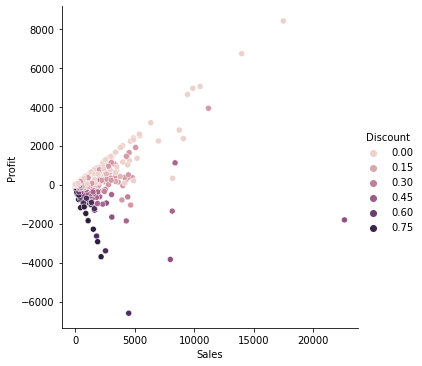

In [14]:
sns.relplot(x = 'Sales', y = 'Profit', hue = 'Discount',data = data)

We can see, heavy discounts bringing down the profit margin, leading to loss

### Top Down Approach
I'm going to analyze on Region and State Sales and Profits. Later sales and profit analysis will be on the Category and sub-categories focusing on Bottom Profit generating States. Such products will be focused to improve our Overall Profit Margin



### Region Analysis

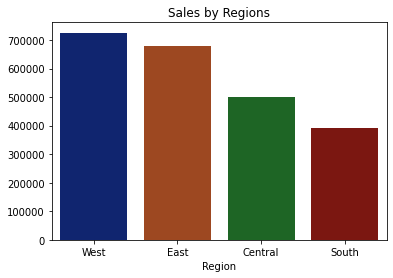

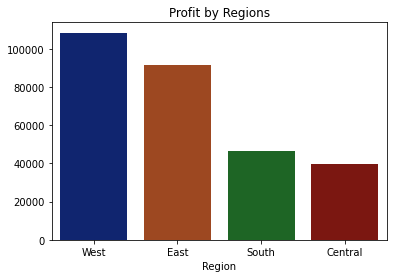

In [15]:
total_region_sales = data.Sales.groupby(data.Region).sum()
total_region_profit = data.Profit.groupby(data.Region).sum()
#pt.figure(figsize=(14,8))
total_region_sales=total_region_sales.sort_values(ascending=False)
total_region_profit=total_region_profit.sort_values(ascending=False)
sns.barplot(total_region_sales.index, total_region_sales.values, palette = 'dark')
pt.title('Sales by Regions')
pt.show()
sns.barplot(total_region_profit.index, total_region_profit.values, palette = 'dark')
pt.title('Profit by Regions')
pt.show()

West generates highest sales followed by Central region. South generating lowest Sales

West generates highest profit among regions, followed by East

Although Central generates 3rd highest in sales, stands bottom when profit margin is considered. Heavy Discounts on products might be possible cause for reduction in profits or majority of the products sold has least profit margin

### States Sales & Profit Analysis

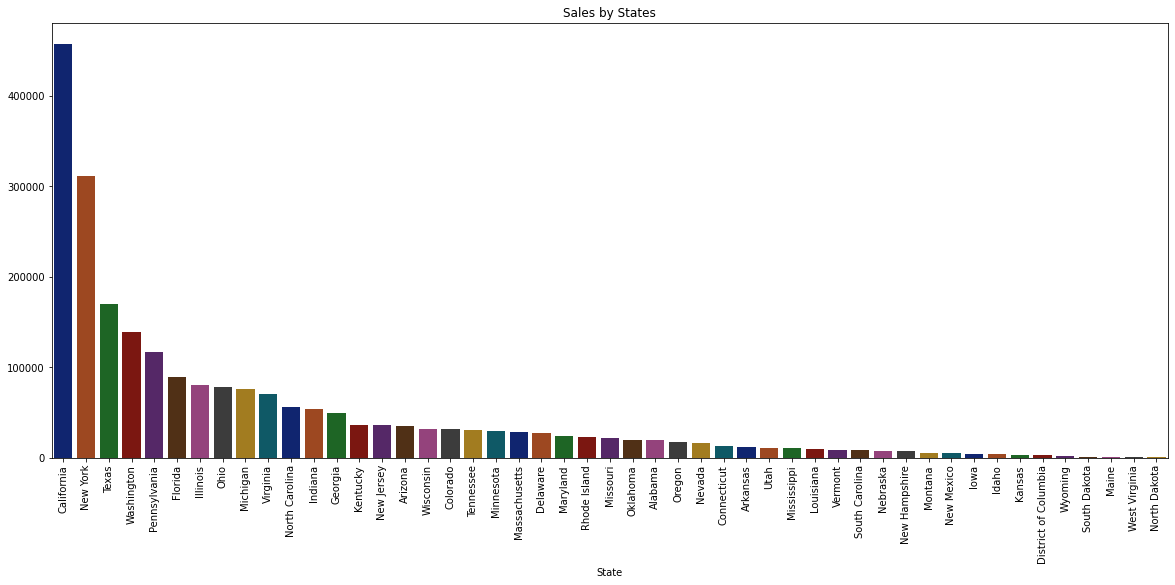

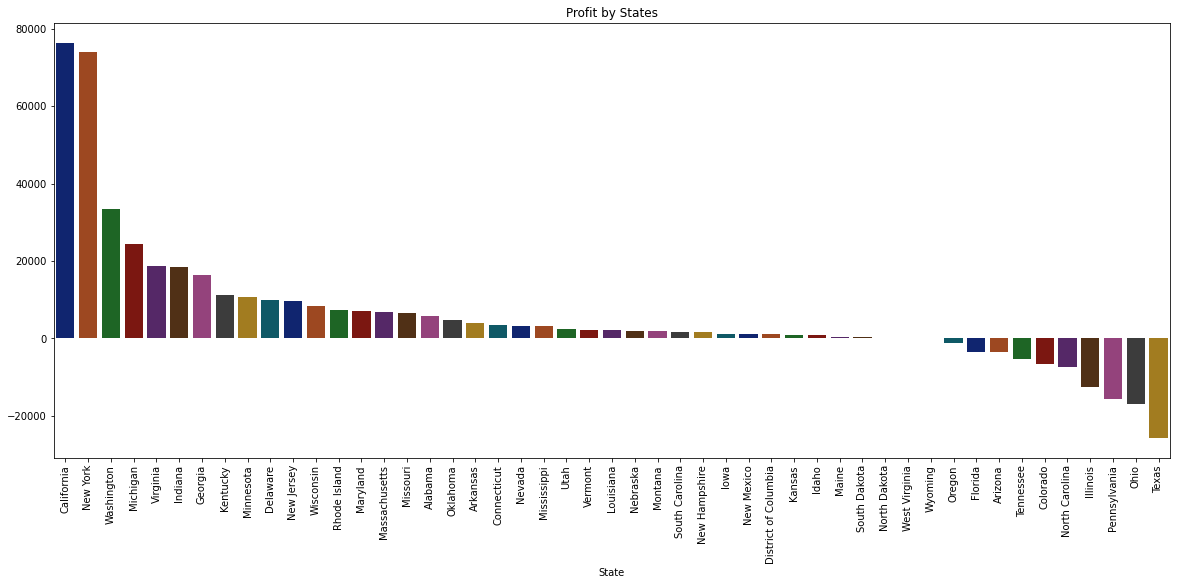

In [16]:
total_state_sales = data.Sales.groupby(data.State).sum()
total_state_profit = data.Profit.groupby(data.State).sum()
pt.figure(figsize=(20,8))
total_state_sales=total_state_sales.sort_values(ascending=False)
total_state_profit=total_state_profit.sort_values(ascending=False)
sns.barplot(total_state_sales.index, total_state_sales.values, palette = 'dark')
pt.title('Sales by States')
pt.xticks(rotation='vertical')
pt.show()
pt.figure(figsize=(20,8))
sns.barplot(total_state_profit.index, total_state_profit.values, palette = 'dark')
pt.title('Profit by States')
pt.xticks(rotation='vertical')
pt.show()

California makes most sales and profit among States, followed by New York

Although Texas makes 3rd highest sales, it stands bottom when considering profit - facing huge loss

Top 5 Loss incurring States are surprisingly the ones which are in Top 10 Revenue generating States

In [18]:
#Loss generating States list
loss_states = [element for element in total_state_profit.tail().index]
loss_states

['North Carolina', 'Illinois', 'Pennsylvania', 'Ohio', 'Texas']

### Sub-Category Analysis for Top 5 Loss incurring States

In [112]:
# Profit by Subcategories all States
total_subcat_profit = data.Profit.groupby(data['Sub-Category']).sum()
total_subcat_profit =total_subcat_profit.sort_values(ascending=False)
print('Sub Category Profit figures \n{}'.format(total_subcat_profit))

Sub Category Profit figures 
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


In [20]:
# Sales and Profit for top 5 loss incurring States 
total_subcat_sales1 = data[data.State.isin(loss_states)].Sales.groupby(data['Sub-Category']).sum()
total_subcat_profit1 = data[data.State.isin(loss_states)].Profit.groupby(data['Sub-Category']).sum()
total_subcat_sales1=total_subcat_sales1.sort_values(ascending=False)
total_subcat_profit1 =total_subcat_profit1.sort_values(ascending=False)
print('Sub Category Profit figures for Top 5 loss incurring States {} \n{}'.format(total_subcat_sales1,total_subcat_profit1))

Sub Category Profit figures for Top 5 loss incurring States Sub-Category
Phones         88694.5680
Chairs         72729.0940
Tables         47932.3630
Storage        47291.0640
Machines       47035.1390
Accessories    35893.0400
Copiers        29439.5300
Bookcases      27043.6728
Binders        24326.6880
Furnishings    19872.2440
Paper          17558.1280
Appliances     16990.9020
Supplies       12185.9680
Art             5895.2160
Envelopes       5141.9600
Labels          1798.0400
Fasteners        899.7440
Name: Sales, dtype: float64 
Sub-Category
Paper           6062.5573
Copiers         5764.8993
Accessories     5260.6277
Envelopes       1732.1169
Art              775.2201
Labels           610.6756
Fasteners        237.0362
Phones          -620.2017
Supplies       -2394.3017
Storage        -2818.0208
Furnishings    -4991.9794
Chairs         -6594.3928
Appliances     -6963.4963
Bookcases      -7300.8000
Tables        -15514.7635
Machines      -21715.8028
Binders       -29888.8665
N

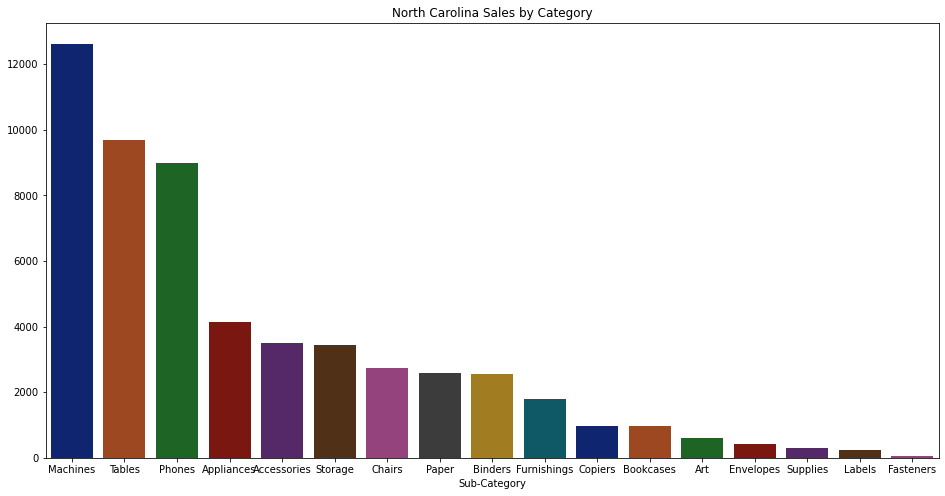

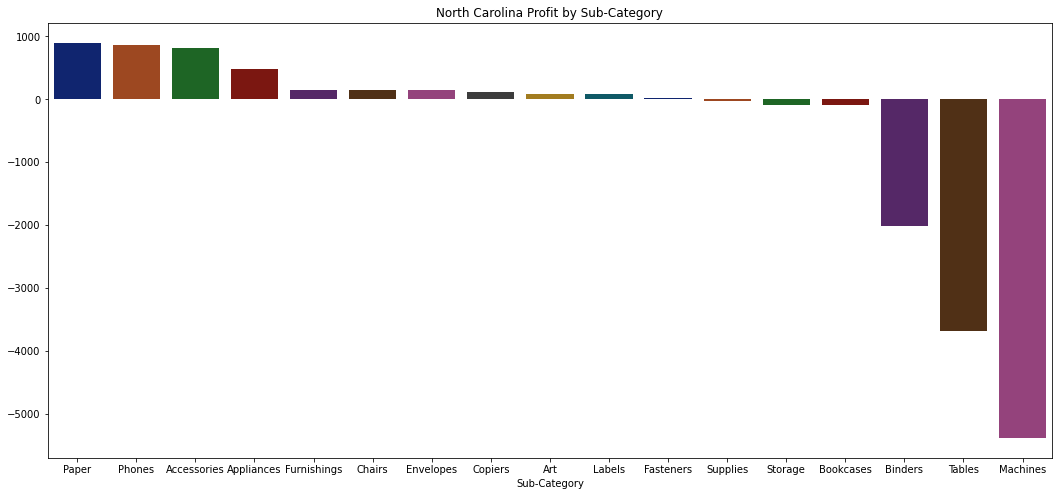

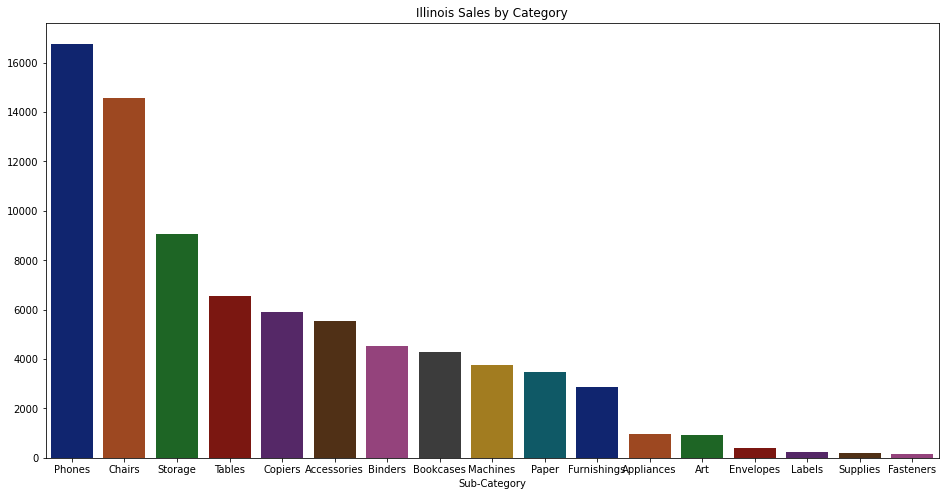

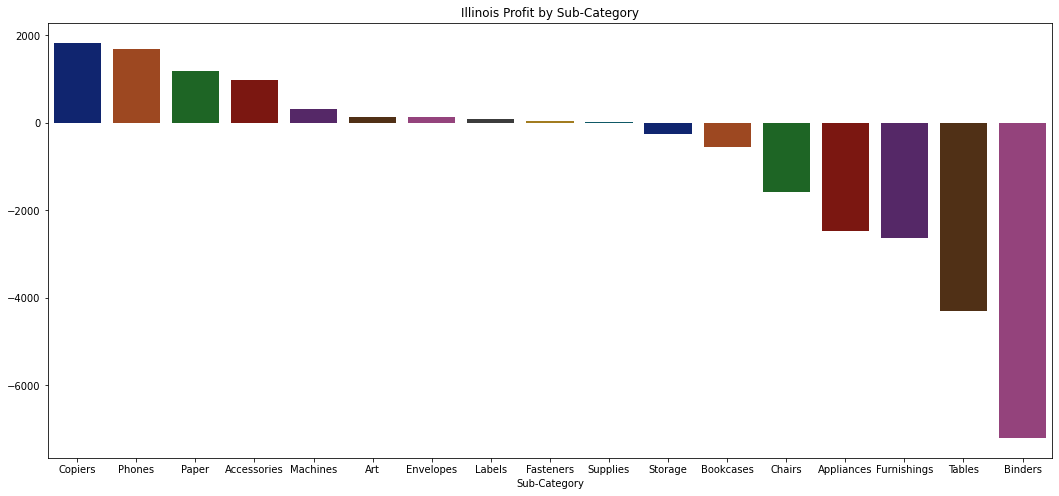

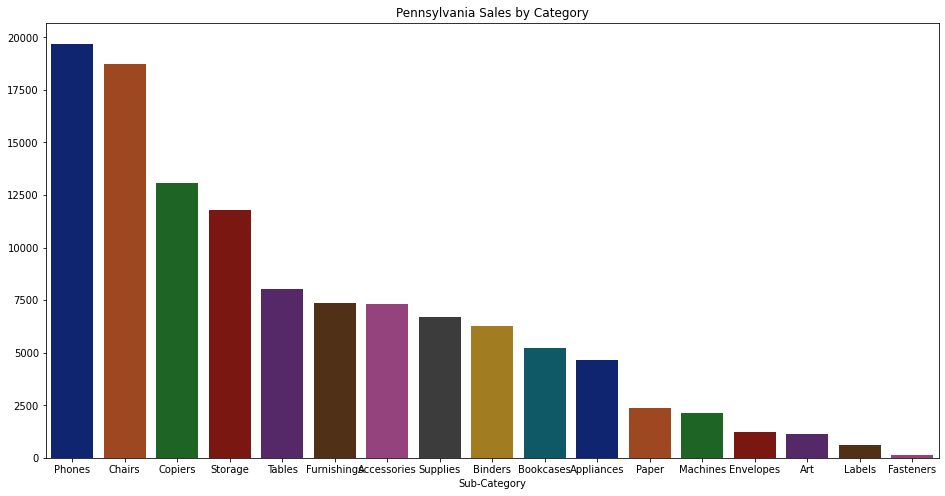

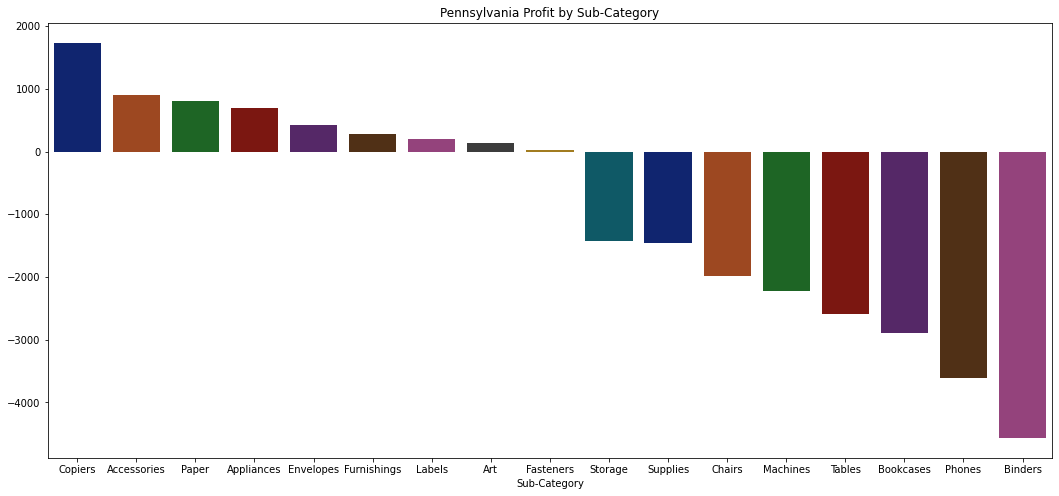

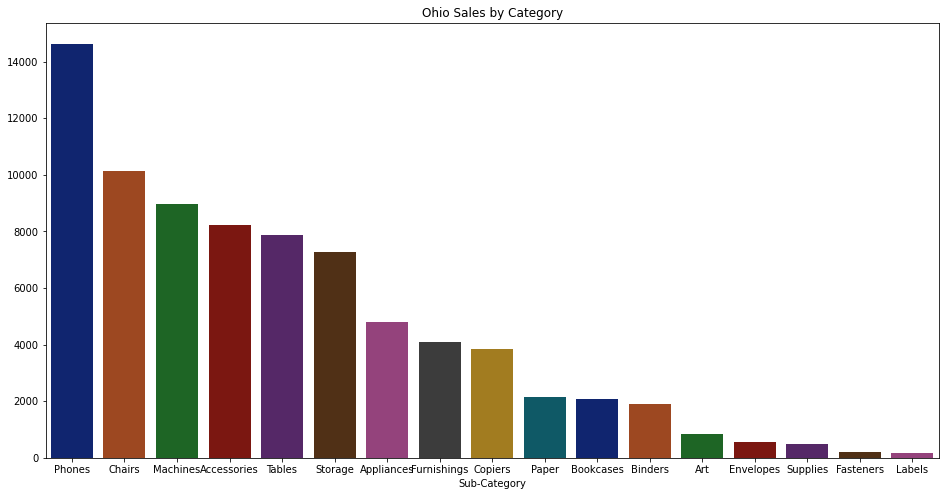

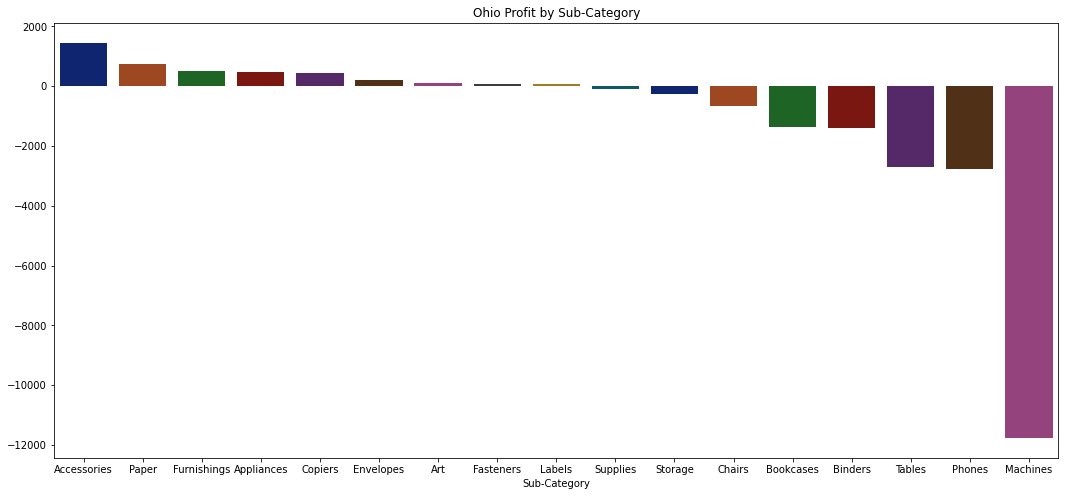

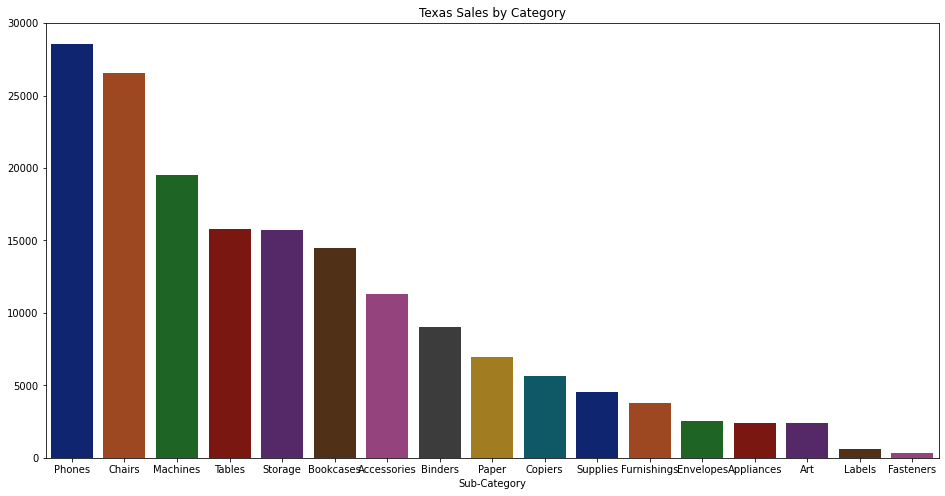

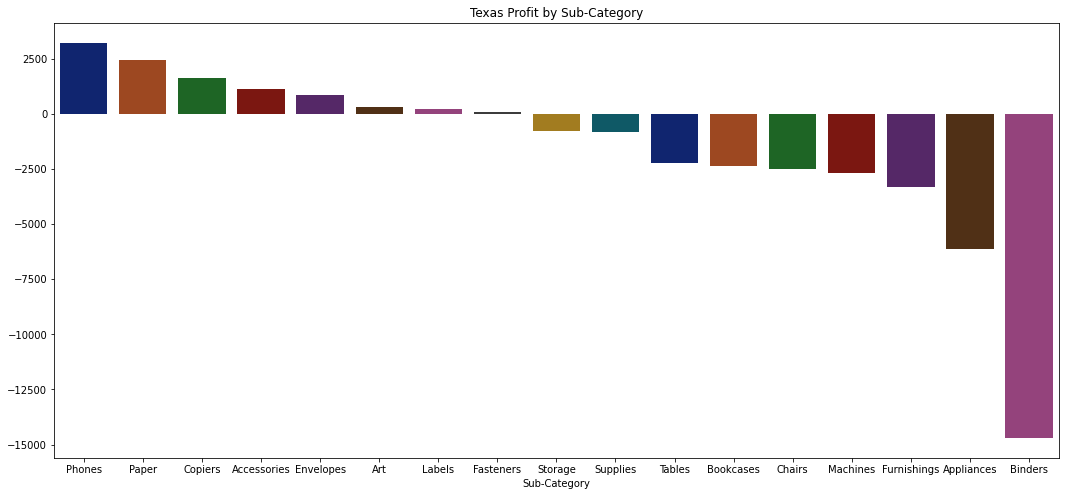

In [23]:
    for element in loss_states :
        State = (data['State'] == element)
        total_subcat_sales2 = data[State].Sales.groupby(data['Sub-Category']).sum()
        total_subcat_profit2 = data[State].Profit.groupby(data['Sub-Category']).sum()
        total_subcat_sales2=total_subcat_sales2.sort_values(ascending=False)
        total_subcat_profit2 =total_subcat_profit2.sort_values(ascending=False)
        pt.figure(figsize=(16,8))
        sns.barplot(total_subcat_sales2.index, total_subcat_sales2.values, palette = 'dark')
        pt.title('{} Sales by Category'.format(element))
        pt.show()
        pt.figure(figsize=(18,8))
        sns.barplot(total_subcat_profit2.index, total_subcat_profit2.values, palette = 'dark')
        pt.title('{} Profit by Sub-Category'.format(element))
        pt.show()
    #print('{}  {}\n'.format(element,total_profit1.tail()))  

From the above observation, atleast of top 2 sales generating products in each state can be found in bottom 5 profit generating products

Table, Chair, Machine, Binders, Bookcases which contributes almost 44% revenue in the top 5 loss incurring states, incurs around 83% of the total loss in these States

### Discount analysis on Sub-Category

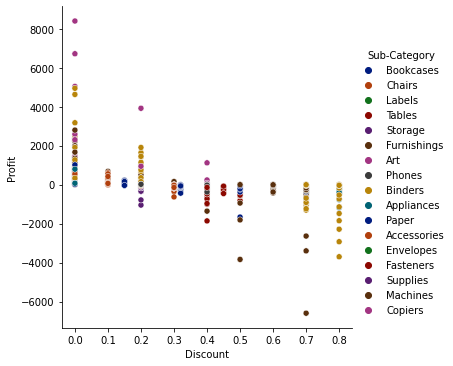

In [33]:
# Profit analysis of Sub-Category based on Discount
sns.relplot(x = 'Discount', y = 'Profit', hue = 'Sub-Category', palette = "dark",data = data)

At the right end, where the discounts are high, losses are observed - i.e >=0.5% discount for products like Machines, Binders

#### Discount analysis in top 5 loss incurring States on selected products

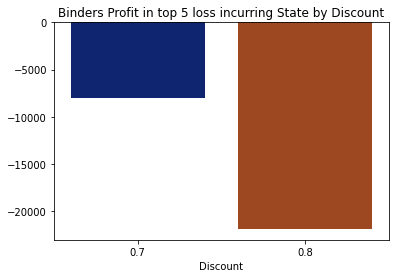

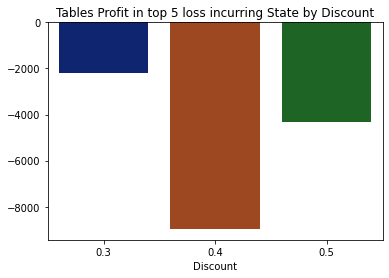

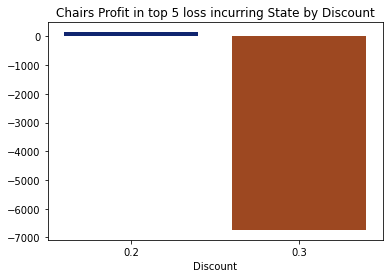

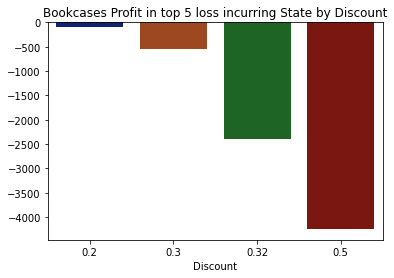

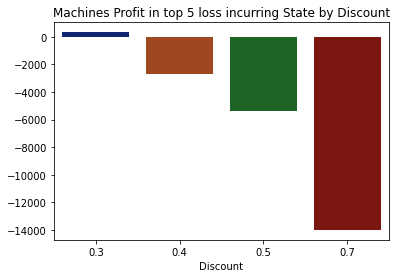

In [26]:
Sub_Cat = ['Binders','Tables','Chairs','Bookcases','Machines']
for element in Sub_Cat :
    Sub_Ca = (data[data.State.isin(loss_states)]['Sub-Category'] == element)
    total_sales2 = data[data.State.isin(loss_states)][Sub_Ca].Sales.groupby(data.Discount).sum()
    total_profit2 = data[data.State.isin(loss_states)][Sub_Ca].Profit.groupby(data.Discount).sum()
    #pt.figure(figsize=(14,8))
    #total_sales2=total_sales2.sort_values(ascending=False)
    total_profit2=total_profit2.sort_values(ascending=False)
    #sns.barplot(total_sales2.index, total_sales2.values, palette = 'dark')
    #pt.title('Sales by Discount')
    #pt.show()
    sns.barplot(total_profit2.index, total_profit2.values, palette = 'dark')
    pt.title('{} Profit in top 5 loss incurring State by Discount'.format(element))
    pt.show()

From the above observation it is very clear that unregulated discount on products is causing huge loss, despite having good revenue

### Sales and Profit analysis based on City

Further analysis for city specific suggestions

In [111]:
data.groupby('City').sum().sort_values('Sales',ascending= False).head(10)

,Sales,Quantity,Discount,Profit
City,,,,
New York City,256368.1610,3417,51.40,62036.9837
Los Angeles,175851.3410,2879,55.50,30440.7579
Seattle,119540.7420,1590,27.80,29156.0967
San Francisco,112669.0920,1935,34.00,17507.3854
Philadelphia,109077.0130,1981,175.50,-13837.7674
Houston,64504.7604,1466,143.14,-10153.5485
Chicago,48539.5410,1132,120.50,-6654.5688
San Diego,47521.0290,670,13.60,6377.1960
Jacksonville,44713.1830,429,35.85,-2323.8350


In [97]:
data.groupby('City').sum().sort_values('Profit').head()

,Sales,Quantity,Discount,Profit
City,,,,
Philadelphia,109077.0130,1981,175.50,-13837.7674
Houston,64504.7604,1466,143.14,-10153.5485
San Antonio,21843.5280,247,22.60,-7299.0502
Lancaster,9891.4640,171,14.50,-7239.0684
Chicago,48539.5410,1132,120.50,-6654.5688


Philadelphia, Houston, Chicago which are among top 10 revenue generating cities are also top 5 loss incurring cities

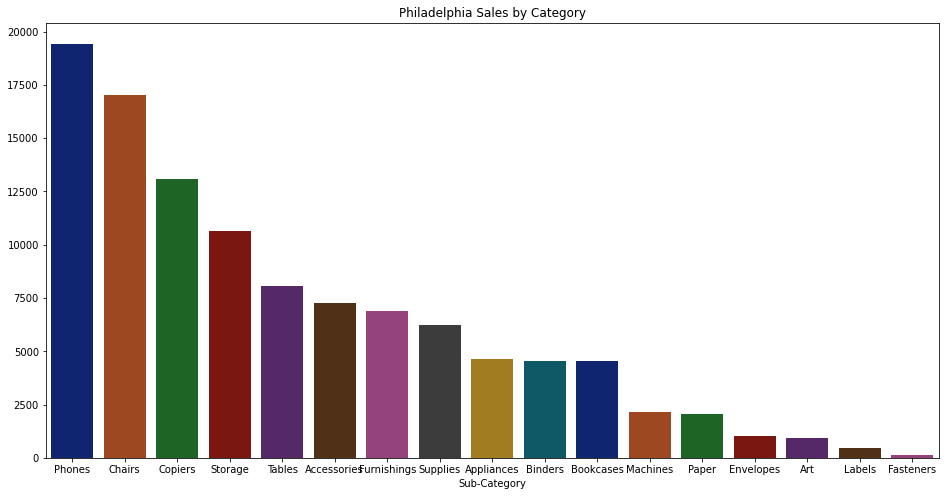

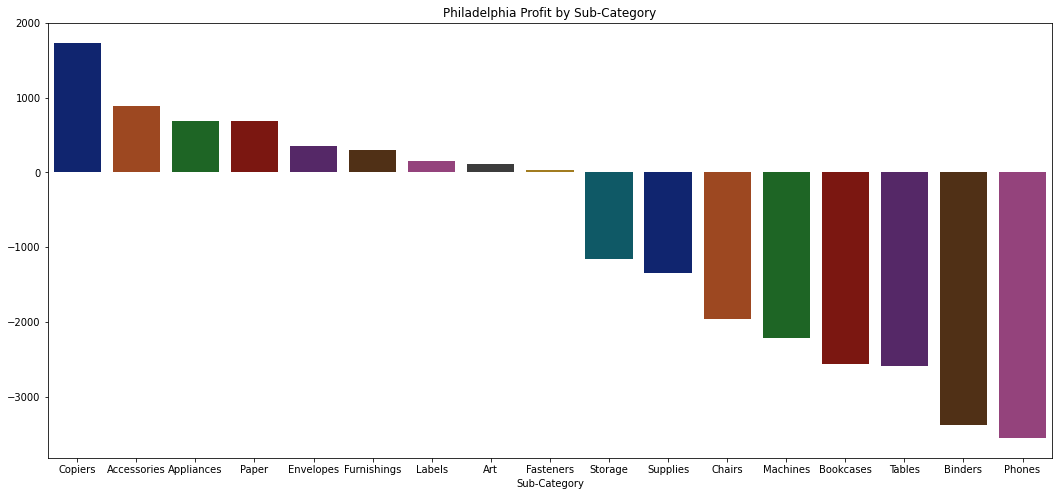

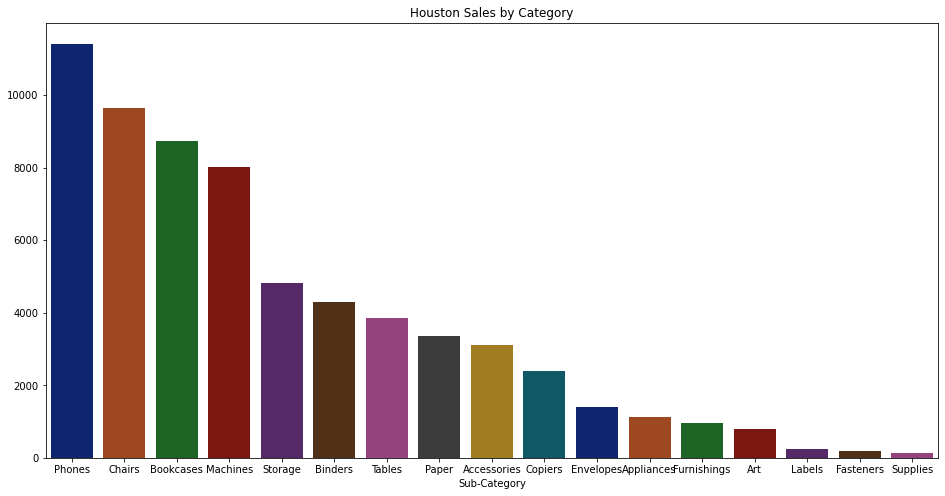

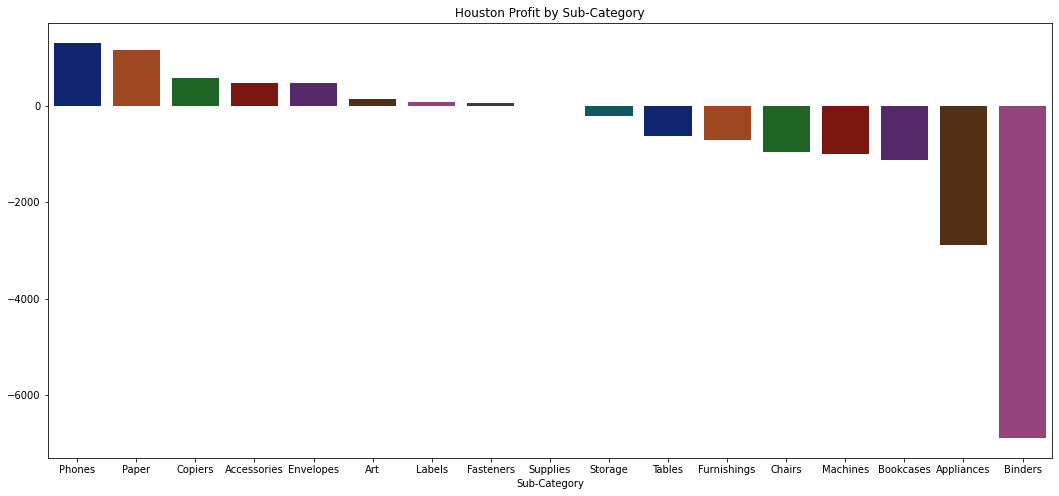

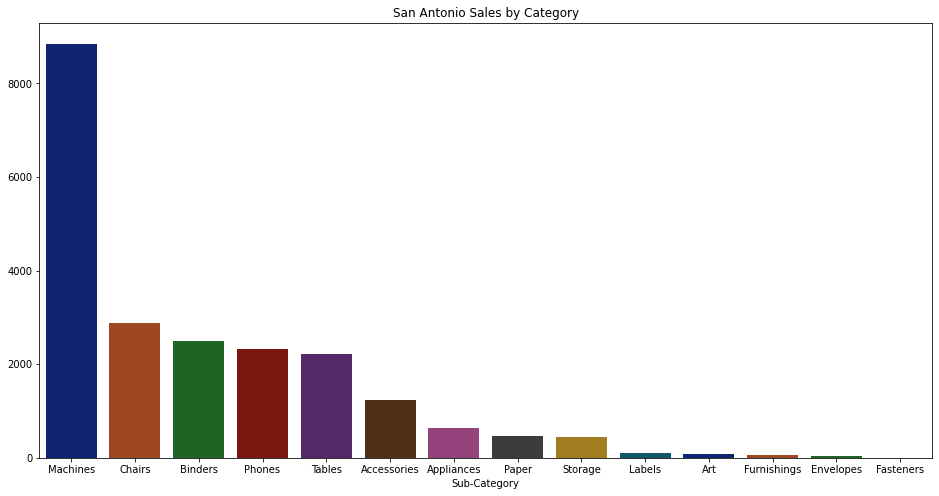

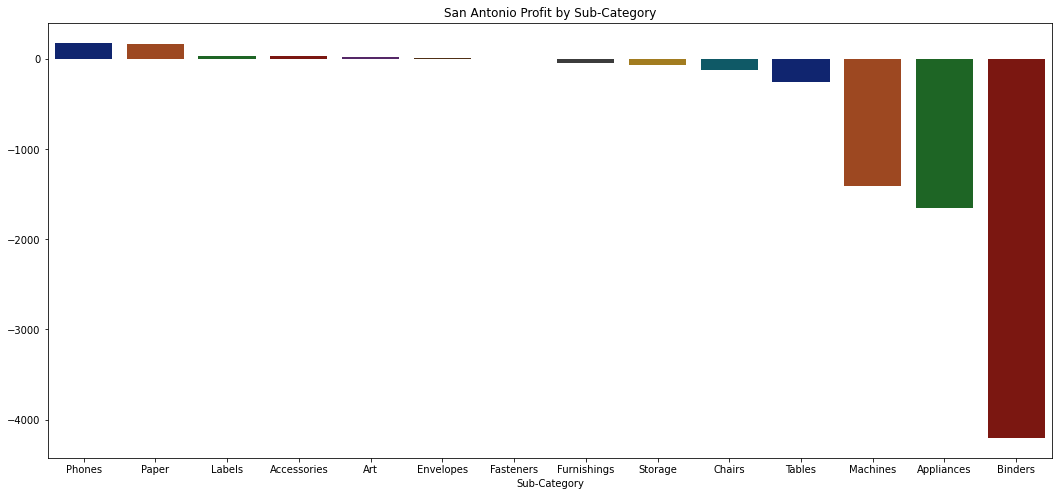

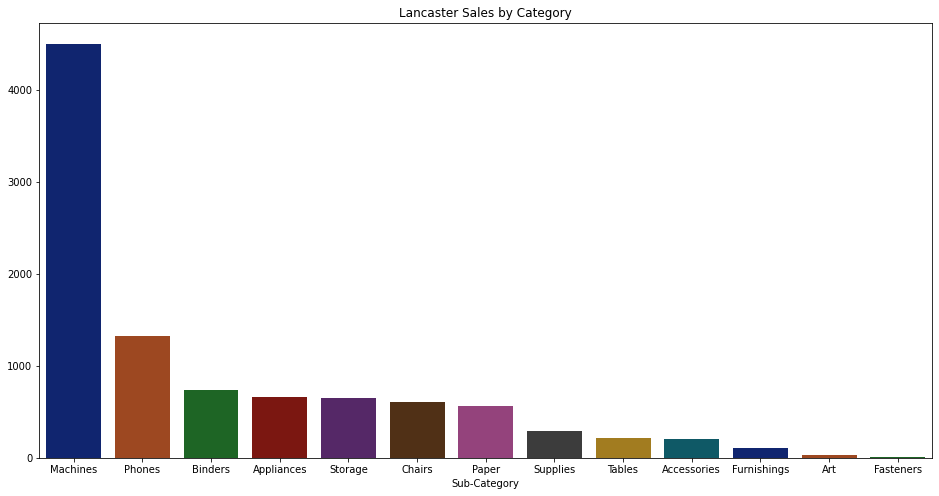

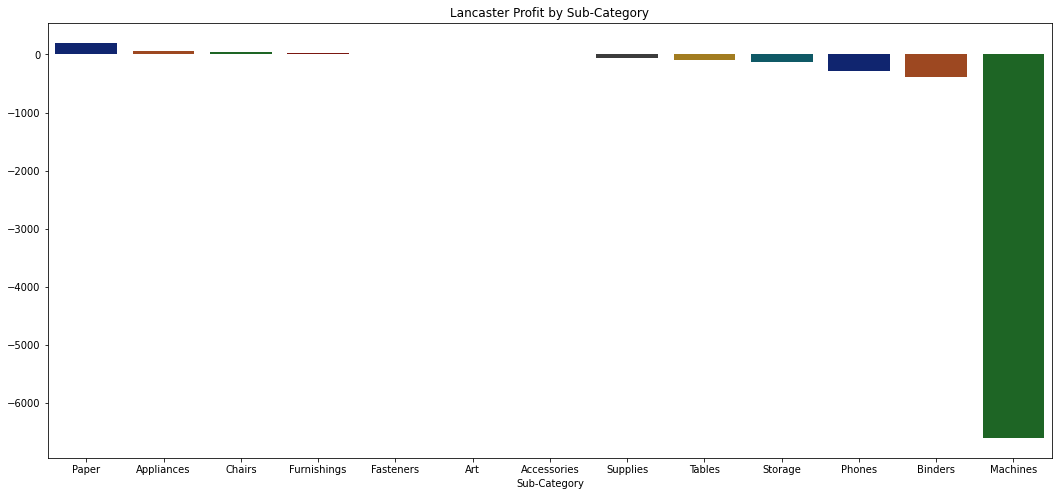

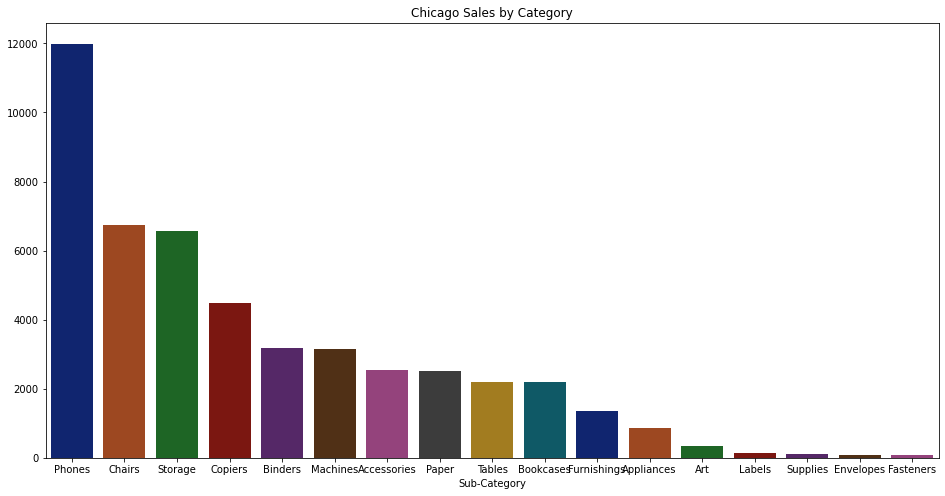

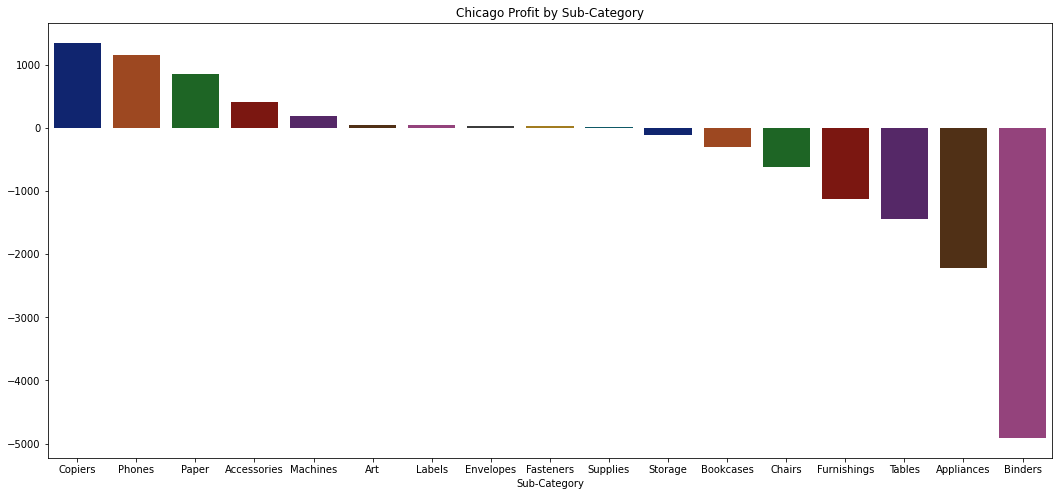

In [98]:
 for element in ['Philadelphia','Houston','San Antonio','Lancaster','Chicago'] :
        State = (data['City'] == element)
        total_city_sales2 = data[State].Sales.groupby(data['Sub-Category']).sum()
        total_city_profit2 = data[State].Profit.groupby(data['Sub-Category']).sum()
        total_city_sales2=total_city_sales2.sort_values(ascending=False)
        total_city_profit2 =total_city_profit2.sort_values(ascending=False)
        pt.figure(figsize=(16,8))
        sns.barplot(total_city_sales2.index, total_city_sales2.values, palette = 'dark')
        pt.title('{} Sales by Category'.format(element))
        pt.show()
        pt.figure(figsize=(18,8))
        sns.barplot(total_city_profit2.index, total_city_profit2.values, palette = 'dark')
        pt.title('{} Profit by Sub-Category'.format(element))
        pt.show()

Binders as observed before, is the main product causing losses in majority of the cities above (Chicago. San Antanio, Houston)
Apart from that Phones in Philidelphia and Machines in Lancaster contributing majority to the losses, despite generating high sales in respective city

In [103]:
data.groupby('Segment').sum().sort_values('Sales', ascending =False).head()

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [104]:
data.groupby('Ship Mode').sum().sort_values('Sales',ascending=False).head()   

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
Standard Class,1.358216e+06,22797,955.02,164088.7875
Second Class,4.591936e+05,7423,270.15,57446.6354
First Class,3.514284e+05,5693,253.17,48969.8399
Same Day,1.283631e+05,1960,82.75,15891.7589


No significant observation above

### Observations

1) Reduction in Profit, in most cases loss incurred due to unregulated discounts

2) West Region generates highest sales & Profit, Central Region despite generating 3rd highest sales generates least Profit

3) Among States California & New York generates highest Sales & Profit

4) Top 5 loss incurring States are among the top 10 generating Sales (Texas, Ohio, Pennsylvania, Illinios, North Carolina). The Products which generated around 44% sales contributed to 83% of the loss in these States

5) 3 of the Top 5 loss incurring cities are among top 10 revenue generating cities (Philadelphia, Chicago, Houston). 

6) In the highest loss incurring States and Cities, it is observed that majority the loss is contributed by the highest revenue generating products

### Suggestion for improving Superstore Profit

Discounts on products to be regulated, especially in the loss incurring States and Cities. Rather than providing high discounts to attract the customers, alternate way has to be identified